# Analytic Vidyha: ML Hackathon (Loan Prediction)

##### 5th place


## 1. Import Lines and files
#### We will be using different Machine learning algorithms to and choose the best out of all of them to classify our test set

In [ ]:
import numpy as np
import os
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd

#### Uploading train and Test files

In [ ]:
ftrain = files.upload()
ftest = files.upload()

Saving train_data.csv to train_data.csv


Saving test_data.csv to test_data.csv


## 2. Data preprocessing

#### Using Pandas to read CSV and get data into dataframe form

In [ ]:
df = pd.read_csv('train_data.csv', sep=',')
df.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [ ]:
# Create array of features
features = {'loan_id',
'age',
'education ',
'proof_submitted',
'loan_amount',
'asset_cost',
'no_of_loans',
'no_of_curr_loans',
'last_delinq_none',
'loan_default'}

In [ ]:
# Check different values for features with string values
df['proof_submitted'].unique()

array(['Aadhar', 'VoterID', 'Driving', 'PAN', 'Passport'], dtype=object)

In [ ]:
# Check for duplicates to get rid of
duplicate = df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [loan_id, age, education, proof_submitted, loan_amount, asset_cost, no_of_loans, no_of_curr_loans, last_delinq_none, loan_default]
Index: []


#### Drop samples with Null values and Check if Data is enough

In [ ]:
df.dtypes

loan_id               int64
age                   int64
education           float64
proof_submitted      object
loan_amount           int64
asset_cost            int64
no_of_loans           int64
no_of_curr_loans      int64
last_delinq_none      int64
loan_default          int64
dtype: object

In [ ]:
df.isnull().any()

loan_id             False
age                 False
education            True
proof_submitted     False
loan_amount         False
asset_cost          False
no_of_loans         False
no_of_curr_loans    False
last_delinq_none    False
loan_default        False
dtype: bool

In [ ]:
# Null values in education means no proof which can be a value and not an error in the data so replace it with zero
df['education'].fillna(0, inplace =True)

In [ ]:
df.isnull().any()

loan_id             False
age                 False
education           False
proof_submitted     False
loan_amount         False
asset_cost          False
no_of_loans         False
no_of_curr_loans    False
last_delinq_none    False
loan_default        False
dtype: bool

In [ ]:
# Replace string with numbers
df['proof_submitted'].replace(['Aadhar', 'VoterID', 'Driving', 'PAN', 'Passport'], [0,1,2,3,4], inplace=True)

#### Check if Data is Balanced

In [ ]:
df.shape

(7000, 10)

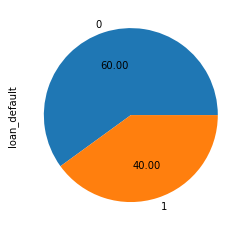

In [ ]:
# Plotting counts
df['loan_default'].value_counts().plot.pie(autopct='%.2f')

In [ ]:
# Data Balancing
g = df.groupby('loan_default')
df = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

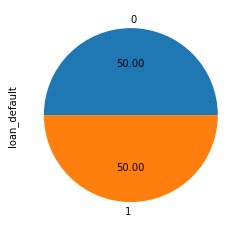

In [ ]:
# Plotting counts of g & h
df['loan_default'].value_counts().plot.pie(autopct='%.2f')

In [ ]:
df.shape

(5600, 10)

In [ ]:
df.head()

loan_id  age  education  proof_submitted  loan_amount  \
loan_default                                                            
0            0      847   26        1.0                0       735072   
             1     4427   45        1.0                0       710556   
             2     6734   39        1.0                2       718956   
             3     3355   38        1.0                0       712164   
             4     2580   29        2.0                0       708156   

                asset_cost  no_of_loans  no_of_curr_loans  last_delinq_none  \
loan_default                                                                  
0            0      876000            0                 0                 0   
             1      927048            0                 0                 0   
             2      937560           16                 6                 1   
             3      867600            0                 0                 0   
             4      861528            2                 2                 0   

                loan_default  
loan_default                  
0            0             0  
             1             0  
             2             0  
             3             0  
             4             0

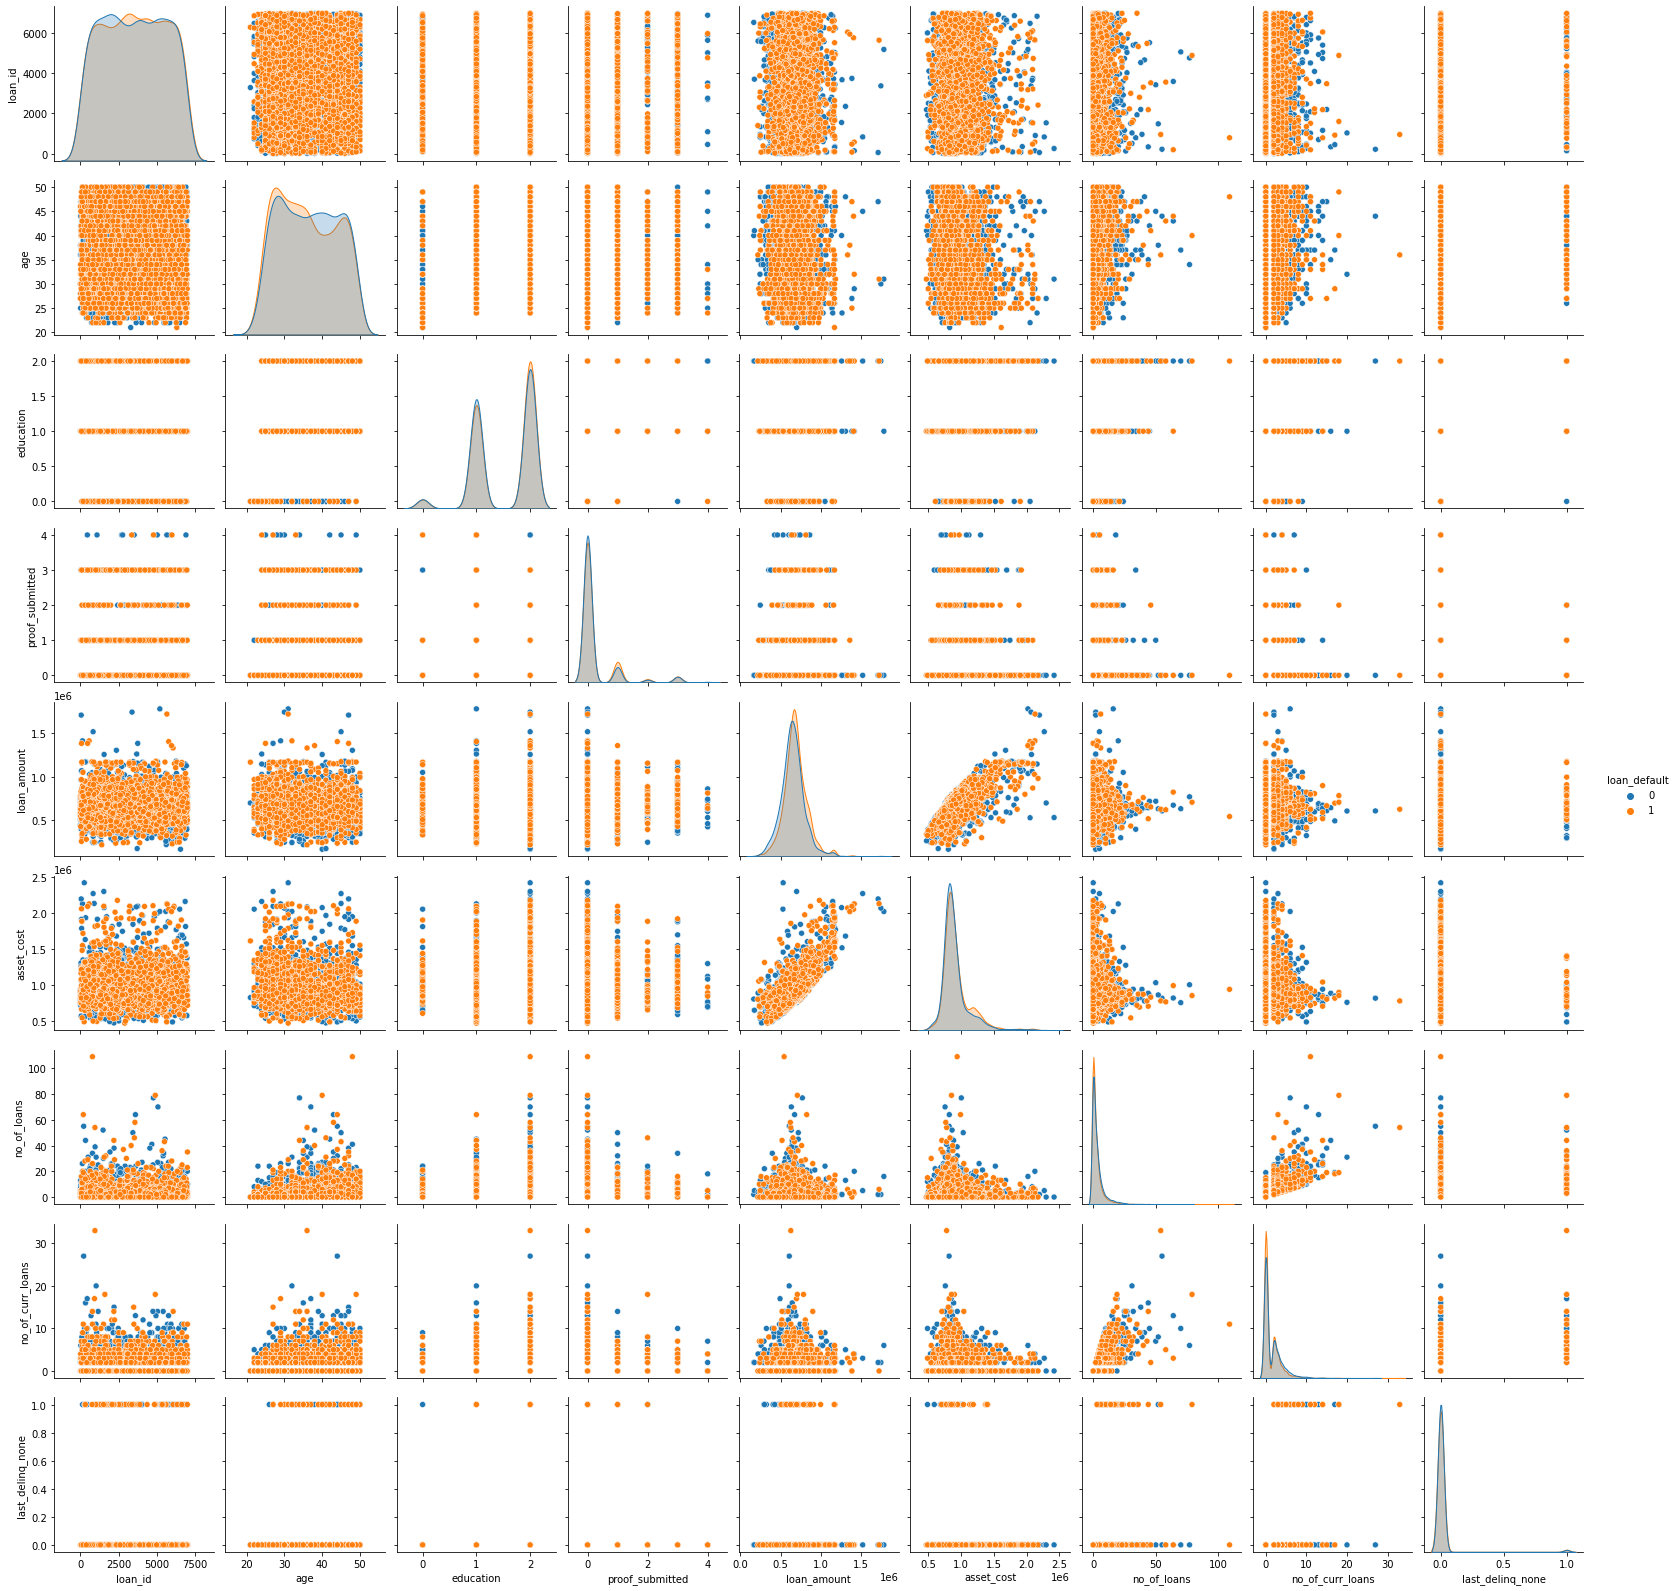

In [ ]:
import seaborn as sns
sns.pairplot(df, hue="loan_default")

## 3. Split the data into X and Y

In [ ]:
X = df.iloc[:,1:9].values
Y = df.iloc[:,9].values

## 4. Split the data into train and test sets and then classify the data

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm

### Performing classification Using Standard Scaler

In [ ]:
X1 = StandardScaler().fit_transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.2, random_state =42)

#### Decision Tree

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.51      0.53       588
           1       0.50      0.53      0.51       532

    accuracy                           0.52      1120
   macro avg       0.52      0.52      0.52      1120
weighted avg       0.52      0.52      0.52      1120

Confusion Matrix:


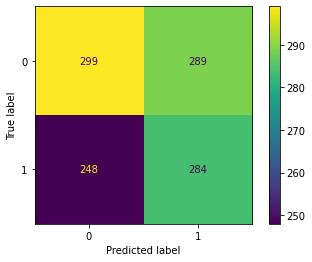

In [ ]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train, y_train)
y_pred1 = clf1.predict(x_test)
print('Classification Report:')
print(classification_report(y_test, y_pred1))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred1))
d.plot()
plt.show()

#### Naive Bayes

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       588
           1       0.55      0.53      0.54       532

    accuracy                           0.57      1120
   macro avg       0.57      0.57      0.57      1120
weighted avg       0.57      0.57      0.57      1120

Confusion Matrix:


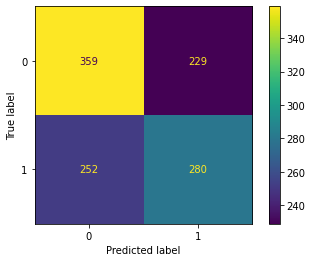

In [ ]:
clf2 = GaussianNB()
clf2 = clf2.fit(x_train, y_train)
y_pred2 = clf2.predict(x_test)
print('Classification Report:')
print(classification_report(y_test, y_pred2))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred2))
d.plot()
plt.show()

#### KNN

In [ ]:
clf = KNeighborsClassifier()
# defining parameter range
n_range = [31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63]
param_grid = dict(n_neighbors=n_range)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 17 candidates, totalling 170 fits


{'n_neighbors': 59}


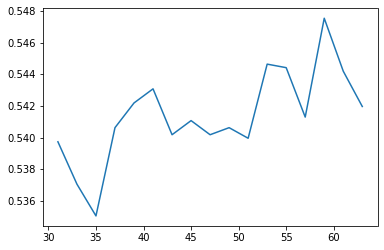

In [ ]:
print(grid_search.best_params_)
results = pd.DataFrame.from_dict(grid_search.cv_results_)
plt.plot(results['param_n_neighbors'],results['mean_test_score'])

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.47      0.53       588
           1       0.54      0.68      0.60       532

    accuracy                           0.57      1120
   macro avg       0.58      0.57      0.57      1120
weighted avg       0.58      0.57      0.56      1120

Confusion Matrix:


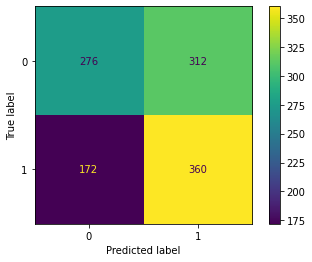

In [ ]:
k = grid_search.best_params_['n_neighbors']
clf3 =  KNeighborsClassifier(k)
clf3 = clf3.fit(x_train, y_train)
y_pred3 = clf3.predict(x_test)
print('Classification Report:')
print(classification_report(y_test, y_pred3))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred3))
d.plot()
plt.show()

#### ADABOOST

In [ ]:
clf = AdaBoostClassifier()
# defining parameter range
n_range = [140,160,180,200,250,300,350,400,450,500,550,600,750,800]
param_grid = dict(n_estimators=n_range)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


{'n_estimators': 200}


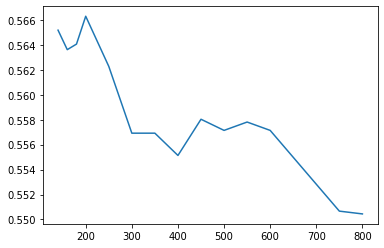

In [ ]:
print(grid_search.best_params_)
results = pd.DataFrame.from_dict(grid_search.cv_results_)
plt.plot(results['param_n_estimators'],results['mean_test_score'])

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.51      0.56       588
           1       0.54      0.63      0.58       532

    accuracy                           0.57      1120
   macro avg       0.57      0.57      0.57      1120
weighted avg       0.57      0.57      0.57      1120

Confusion Matrix:


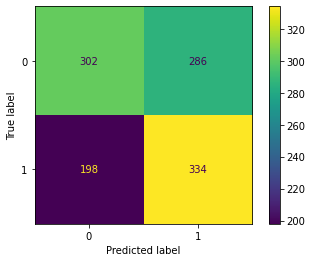

In [ ]:
n_est = grid_search.best_params_['n_estimators']
clf4 = AdaBoostClassifier(n_estimators=n_est)
clf4 = clf4.fit(x_train, y_train)
y_pred4 = clf4.predict(x_test)
print('Classification Report:')
print(classification_report(y_test, y_pred4))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred4))
d.plot()
plt.show()

#### Random Forest

In [ ]:
clf = RandomForestClassifier()
# defining parameter range
n_range = [60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250]
param_grid = dict(n_estimators=n_range)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'n_estimators': 250}


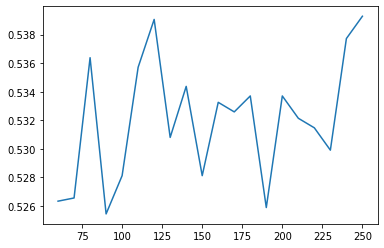

In [ ]:
print(grid_search.best_params_)
results = pd.DataFrame.from_dict(grid_search.cv_results_)
plt.plot(results['param_n_estimators'],results['mean_test_score'])

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.51      0.53       588
           1       0.50      0.55      0.52       532

    accuracy                           0.53      1120
   macro avg       0.53      0.53      0.53      1120
weighted avg       0.53      0.53      0.53      1120

Confusion Matrix:


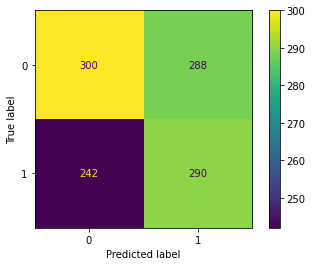

In [ ]:
n_est = grid_search.best_params_['n_estimators']
clf5 = RandomForestClassifier(n_estimators=n_est)
clf5 = clf5.fit(x_train, y_train)
y_pred5 = clf5.predict(x_test)

print('Classification Report:')
print(classification_report(y_test, y_pred5))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred5))
d.plot()
plt.show()

#### SVM 

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.43      0.51       588
           1       0.54      0.72      0.61       532

    accuracy                           0.57      1120
   macro avg       0.58      0.58      0.56      1120
weighted avg       0.59      0.57      0.56      1120

Confusion Matrix:


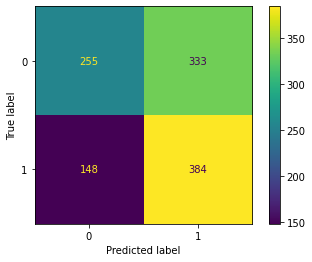

In [ ]:
clf6 = svm.SVC()
clf6 = clf6.fit(x_train, y_train)
y_pred6 = clf6.predict(x_test)

print('Classification Report:')
print(classification_report(y_test, y_pred6))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred6))
d.plot()
plt.show()

#### Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.49      0.54       588
           1       0.54      0.67      0.60       532

    accuracy                           0.57      1120
   macro avg       0.58      0.58      0.57      1120
weighted avg       0.58      0.57      0.57      1120

Confusion Matrix:


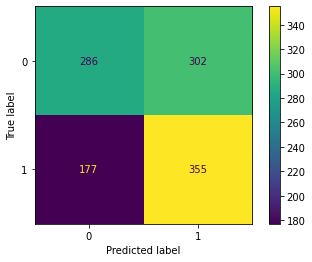

In [ ]:
clf7 = LogisticRegression()
clf7 = clf7.fit(x_train, y_train)
y_pred7 = clf7.predict(x_test)

print('Classification Report:')
print(classification_report(y_test, y_pred7))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred7))
d.plot()
plt.show()

#### Combined Voting Classifier

In [ ]:
y_pred = np.asarray([1 if (y2+y3+y4+y5+y7) > 2 else 0 for y2,y3,y4,y5,y7 in zip(y_pred2, y_pred3, y_pred4, y_pred5, y_pred7)])

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.53      0.57       588
           1       0.56      0.65      0.60       532

    accuracy                           0.59      1120
   macro avg       0.59      0.59      0.59      1120
weighted avg       0.59      0.59      0.59      1120

Confusion Matrix:


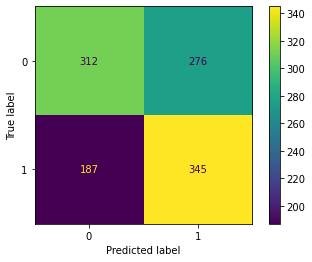

In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
d.plot()
plt.show()

### Performing classification Using Quantile Transformer

In [ ]:
X2 = QuantileTransformer().fit_transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X2, Y, test_size = 0.2, random_state =42)

#### Decision Tree

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.50      0.52       588
           1       0.49      0.52      0.51       532

    accuracy                           0.51      1120
   macro avg       0.51      0.51      0.51      1120
weighted avg       0.51      0.51      0.51      1120

Confusion Matrix:


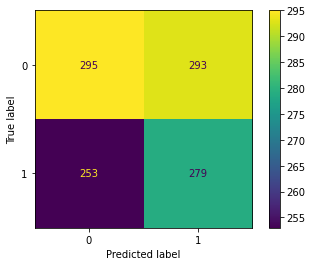

In [ ]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train, y_train)
y_pred1 = clf1.predict(x_test)
print('Classification Report:')
print(classification_report(y_test, y_pred1))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred1))
d.plot()
plt.show()

#### Naive Bayes

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.63      0.61       588
           1       0.56      0.51      0.53       532

    accuracy                           0.57      1120
   macro avg       0.57      0.57      0.57      1120
weighted avg       0.57      0.57      0.57      1120

Confusion Matrix:


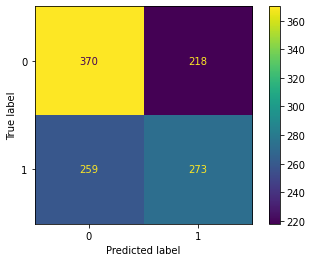

In [ ]:
clf2 = GaussianNB()
clf2 = clf2.fit(x_train, y_train)
y_pred2 = clf2.predict(x_test)
print('Classification Report:')
print(classification_report(y_test, y_pred2))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred2))
d.plot()
plt.show()

#### KNN

In [ ]:
clf = KNeighborsClassifier()
# defining parameter range
n_range = [31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63]
param_grid = dict(n_neighbors=n_range)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 17 candidates, totalling 170 fits


{'n_neighbors': 59}


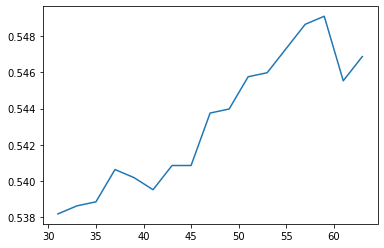

In [ ]:
print(grid_search.best_params_)
results = pd.DataFrame.from_dict(grid_search.cv_results_)
plt.plot(results['param_n_neighbors'],results['mean_test_score'])

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.51      0.55       588
           1       0.54      0.64      0.58       532

    accuracy                           0.57      1120
   macro avg       0.57      0.57      0.57      1120
weighted avg       0.57      0.57      0.57      1120

Confusion Matrix:


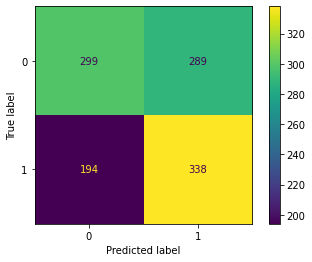

In [ ]:
k = grid_search.best_params_['n_neighbors']
clf3 =  KNeighborsClassifier(k)
clf3 = clf3.fit(x_train, y_train)
y_pred3 = clf3.predict(x_test)
print('Classification Report:')
print(classification_report(y_test, y_pred3))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred3))
d.plot()
plt.show()

#### ADABOOST

In [ ]:
clf = AdaBoostClassifier()
# defining parameter range
n_range = [140,160,180,200,250,300,350,400,450,500,550,600,750,800]
param_grid = dict(n_estimators=n_range)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


{'n_estimators': 200}


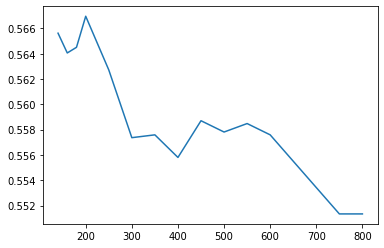

In [ ]:
print(grid_search.best_params_)
results = pd.DataFrame.from_dict(grid_search.cv_results_)
plt.plot(results['param_n_estimators'],results['mean_test_score'])

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.51      0.56       588
           1       0.54      0.63      0.58       532

    accuracy                           0.57      1120
   macro avg       0.57      0.57      0.57      1120
weighted avg       0.57      0.57      0.57      1120

Confusion Matrix:


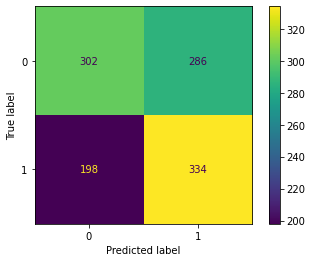

In [ ]:
n_est = grid_search.best_params_['n_estimators']
clf4 = AdaBoostClassifier(n_estimators=n_est)
clf4 = clf4.fit(x_train, y_train)
y_pred4 = clf4.predict(x_test)
print('Classification Report:')
print(classification_report(y_test, y_pred4))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred4))
d.plot()
plt.show()

#### Random Forest

In [ ]:
clf = RandomForestClassifier()
# defining parameter range
n_range = [60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250]
param_grid = dict(n_estimators=n_range)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'n_estimators': 100}


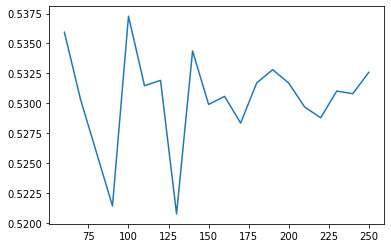

In [ ]:
print(grid_search.best_params_)
results = pd.DataFrame.from_dict(grid_search.cv_results_)
plt.plot(results['param_n_estimators'],results['mean_test_score'])

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.53      0.55       588
           1       0.51      0.54      0.52       532

    accuracy                           0.54      1120
   macro avg       0.54      0.54      0.54      1120
weighted avg       0.54      0.54      0.54      1120

Confusion Matrix:


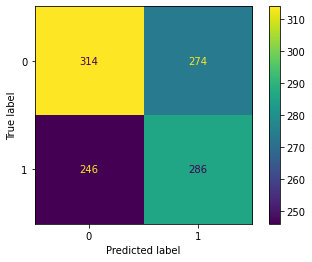

In [ ]:
n_est = grid_search.best_params_['n_estimators']
clf5 = RandomForestClassifier(n_estimators=n_est)
clf5 = clf5.fit(x_train, y_train)
y_pred5 = clf5.predict(x_test)

print('Classification Report:')
print(classification_report(y_test, y_pred5))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred5))
d.plot()
plt.show()

#### SVM 

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.49      0.55       588
           1       0.55      0.68      0.60       532

    accuracy                           0.58      1120
   macro avg       0.59      0.58      0.58      1120
weighted avg       0.59      0.58      0.58      1120

Confusion Matrix:


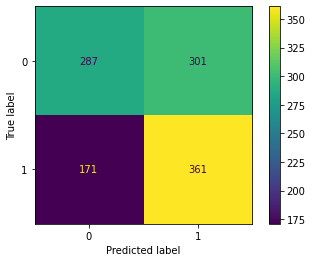

In [ ]:
from sklearn import svm
clf6 = svm.SVC()
clf6 = clf6.fit(x_train, y_train)
y_pred6 = clf6.predict(x_test)

print('Classification Report:')
print(classification_report(y_test, y_pred6))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred6))
d.plot()
plt.show()

#### Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.52      0.56       588
           1       0.55      0.63      0.59       532

    accuracy                           0.58      1120
   macro avg       0.58      0.58      0.58      1120
weighted avg       0.58      0.58      0.58      1120

Confusion Matrix:


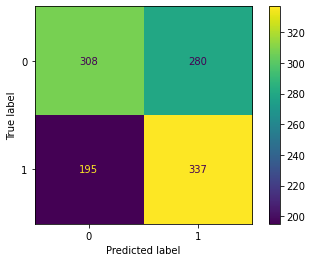

In [ ]:
from sklearn.linear_model import LogisticRegression
clf7 = LogisticRegression()
clf7 = clf7.fit(x_train, y_train)
y_pred7 = clf7.predict(x_test)

print('Classification Report:')
print(classification_report(y_test, y_pred7))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred7))
d.plot()
plt.show()

#### Combined Voting Classifier

In [ ]:
y_pred = np.asarray([1 if (y2+y3+y4+y5+y6) > 2 else 0 for y2,y3,y4,y5,y6 in zip(y_pred2, y_pred3, y_pred4, y_pred5, y_pred6)])

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       588
           1       0.55      0.64      0.59       532

    accuracy                           0.58      1120
   macro avg       0.59      0.59      0.58      1120
weighted avg       0.59      0.58      0.58      1120

Confusion Matrix:


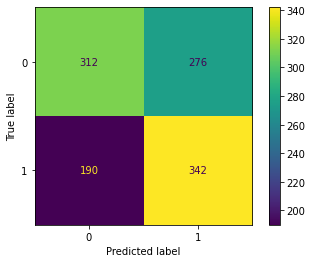

In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
d.plot()
plt.show()

### Performing classification Using Robust Scaler

In [ ]:
X3 = RobustScaler().fit_transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X3, Y, test_size = 0.2, random_state =42)

#### Decision Tree

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.50      0.52       588
           1       0.49      0.53      0.51       532

    accuracy                           0.51      1120
   macro avg       0.51      0.51      0.51      1120
weighted avg       0.51      0.51      0.51      1120

Confusion Matrix:


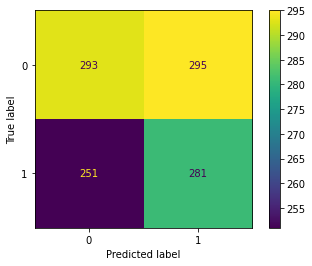

In [ ]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train, y_train)
y_pred1 = clf1.predict(x_test)
print('Classification Report:')
print(classification_report(y_test, y_pred1))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred1))
d.plot()
plt.show()

#### Naive Bayes

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       588
           1       0.55      0.53      0.54       532

    accuracy                           0.57      1120
   macro avg       0.57      0.57      0.57      1120
weighted avg       0.57      0.57      0.57      1120

Confusion Matrix:


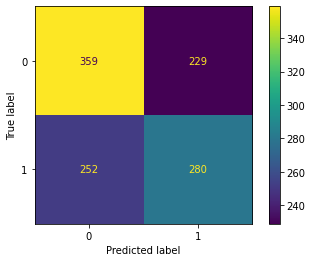

In [ ]:
clf2 = GaussianNB()
clf2 = clf2.fit(x_train, y_train)
y_pred2 = clf2.predict(x_test)
print('Classification Report:')
print(classification_report(y_test, y_pred2))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred2))
d.plot()
plt.show()

#### KNN

In [ ]:
clf = KNeighborsClassifier()
# defining parameter range
n_range = [31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63]
param_grid = dict(n_neighbors=n_range)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 17 candidates, totalling 170 fits


{'n_neighbors': 47}


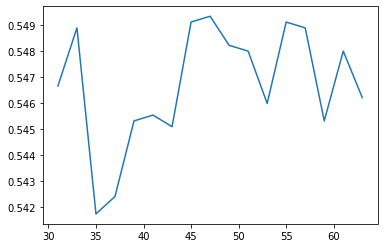

In [ ]:
print(grid_search.best_params_)
results = pd.DataFrame.from_dict(grid_search.cv_results_)
plt.plot(results['param_n_neighbors'],results['mean_test_score'])

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.51      0.56       588
           1       0.55      0.66      0.60       532

    accuracy                           0.58      1120
   macro avg       0.59      0.58      0.58      1120
weighted avg       0.59      0.58      0.58      1120

Confusion Matrix:


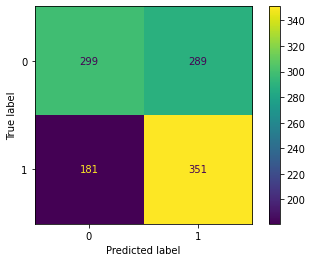

In [ ]:
k = grid_search.best_params_['n_neighbors']
clf3 =  KNeighborsClassifier(k)
clf3 = clf3.fit(x_train, y_train)
y_pred3 = clf3.predict(x_test)
print('Classification Report:')
print(classification_report(y_test, y_pred3))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred3))
d.plot()
plt.show()

#### ADABOOST

In [ ]:
clf = AdaBoostClassifier()
# defining parameter range
n_range = [140,160,180,200,250,300,350,400,450,500,550,600,750,800]
param_grid = dict(n_estimators=n_range)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


{'n_estimators': 200}


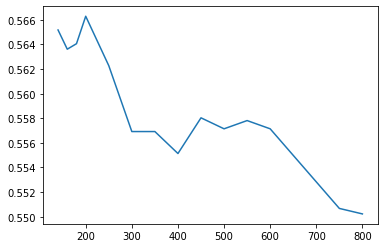

In [ ]:
print(grid_search.best_params_)
results = pd.DataFrame.from_dict(grid_search.cv_results_)
plt.plot(results['param_n_estimators'],results['mean_test_score'])

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.51      0.56       588
           1       0.54      0.63      0.58       532

    accuracy                           0.57      1120
   macro avg       0.57      0.57      0.57      1120
weighted avg       0.57      0.57      0.57      1120

Confusion Matrix:


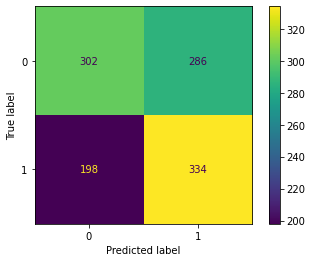

In [ ]:
n_est = grid_search.best_params_['n_estimators']
clf4 = AdaBoostClassifier(n_estimators=n_est)
clf4 = clf4.fit(x_train, y_train)
y_pred4 = clf4.predict(x_test)
print('Classification Report:')
print(classification_report(y_test, y_pred4))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred4))
d.plot()
plt.show()

#### Random Forest

In [ ]:
clf = RandomForestClassifier()
# defining parameter range
n_range = [60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250]
param_grid = dict(n_estimators=n_range)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'n_estimators': 110}


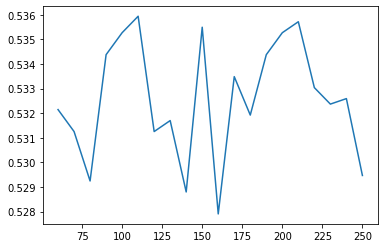

In [ ]:
print(grid_search.best_params_)
results = pd.DataFrame.from_dict(grid_search.cv_results_)
plt.plot(results['param_n_estimators'],results['mean_test_score'])

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.53      0.55       588
           1       0.51      0.54      0.52       532

    accuracy                           0.53      1120
   macro avg       0.53      0.53      0.53      1120
weighted avg       0.54      0.53      0.54      1120

Confusion Matrix:


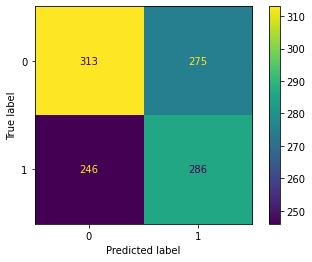

In [ ]:
n_est = grid_search.best_params_['n_estimators']
clf5 = RandomForestClassifier(n_estimators=n_est)
clf5 = clf5.fit(x_train, y_train)
y_pred5 = clf5.predict(x_test)

print('Classification Report:')
print(classification_report(y_test, y_pred5))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred5))
d.plot()
plt.show()

#### SVM 

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.42      0.51       588
           1       0.53      0.73      0.62       532

    accuracy                           0.57      1120
   macro avg       0.58      0.58      0.56      1120
weighted avg       0.59      0.57      0.56      1120

Confusion Matrix:


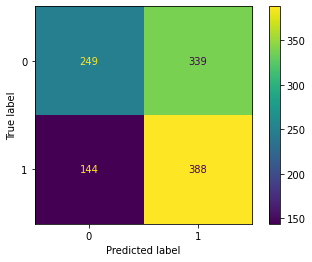

In [ ]:
from sklearn import svm
clf6 = svm.SVC()
clf6 = clf6.fit(x_train, y_train)
y_pred6 = clf6.predict(x_test)

print('Classification Report:')
print(classification_report(y_test, y_pred6))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred6))
d.plot()
plt.show()

#### Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.49      0.55       588
           1       0.54      0.67      0.60       532

    accuracy                           0.57      1120
   macro avg       0.58      0.58      0.57      1120
weighted avg       0.58      0.57      0.57      1120

Confusion Matrix:


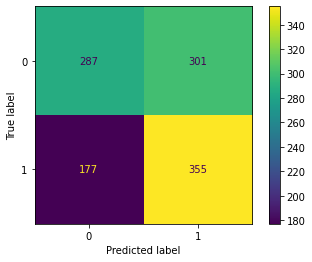

In [ ]:
from sklearn.linear_model import LogisticRegression
clf7 = LogisticRegression()
clf7 = clf7.fit(x_train, y_train)
y_pred7 = clf7.predict(x_test)

print('Classification Report:')
print(classification_report(y_test, y_pred7))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred7))
d.plot()
plt.show()

#### Combined Voting Classifier

In [ ]:
y_pred = np.asarray([1 if (y2+y3+y4+y5+y6) > 2 else 0 for y2,y3,y4,y5,y6 in zip(y_pred2, y_pred3, y_pred4, y_pred5, y_pred6)])

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.51      0.56       588
           1       0.55      0.67      0.60       532

    accuracy                           0.58      1120
   macro avg       0.59      0.59      0.58      1120
weighted avg       0.59      0.58      0.58      1120

Confusion Matrix:


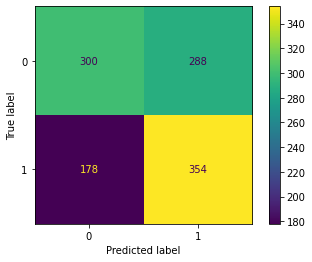

In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
d.plot()
plt.show()

## 5.Final Prediction

### From the previous cells we find that for this data it is the best if we use Standard Scaler for data scaling and Combined voting algorithm to classify the samples

In [ ]:
Xt = X
Yt = Y
sc = StandardScaler()
sc.fit(Xt)
Xt = sc.transform(Xt)
pca = PCA(0.95)
pca.fit(Xt)
Xt = pca.transform(Xt)
clf1 = LogisticRegression().fit(Xt,Y)
clf2 = RandomForestClassifier(n_estimators=250).fit(Xt,Y)
clf3 = AdaBoostClassifier(n_estimators=200).fit(Xt,Y)
clf4 = KNeighborsClassifier(59).fit(Xt,Y)
clf5 = GaussianNB().fit(Xt,Y)

In [ ]:
df2 = pd.read_csv('test_data.csv', sep=',')
df2.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,1.0,Aadhar,636936,768240,2,2,0
1,7002,28,1.0,Aadhar,548988,693060,3,3,0
2,7003,28,1.0,Aadhar,651756,936600,0,0,0
3,7004,45,2.0,Aadhar,614676,744840,4,3,0
4,7005,48,1.0,Aadhar,625236,839400,0,0,0


In [ ]:
df2['education'].fillna(0, inplace =True)

In [ ]:
df2.isnull().any()

loan_id             False
age                 False
education           False
proof_submitted     False
loan_amount         False
asset_cost          False
no_of_loans         False
no_of_curr_loans    False
last_delinq_none    False
dtype: bool

In [ ]:
df2['proof_submitted'].replace(['Aadhar', 'VoterID', 'Driving', 'PAN', 'Passport'], [0,1,2,3,4], inplace=True)

In [ ]:
loan_id = df2.iloc[:,0].values
test = df2.iloc[:,1:9].values
test = sc.transform(test)
test = pca.transform(test)

In [ ]:
y_pred1 = clf1.predict(test)
y_pred2 = clf2.predict(test)
y_pred3 = clf3.predict(test)
y_pred4 = clf4.predict(test)
y_pred5 = clf5.predict(test)

In [ ]:
pred = np.asarray([1 if (y1+y2+y3+y4+y5) > 2 else 0 for y1,y2,y3,y4,y5 in zip(y_pred1, y_pred2, y_pred3, y_pred4, y_pred5)])

In [ ]:
pred = (pred > 0.5).astype(np.int32);

In [ ]:
pred_YN = np.asarray(['Y' if value == 1 else 'N' for value in pred])

In [ ]:
data = {'loan_id':loan_id, 'loan_default':pred}

In [ ]:
dfout = pd.DataFrame(data)

In [ ]:
dfout.head()

,loan_id,loan_default
0,7001,1
1,7002,0
2,7003,1
3,7004,0
4,7005,0


In [ ]:
dfout.to_csv('sub.csv',index=False)